In [2]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 59.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from netCDF4 import Dataset 
import matplotlib.pyplot as plt 

dataset = Dataset('../data/MSWEP/2020116.nc','r') 
global_precip = dataset.variables['precipitation'][:] 
# dataset.close() 

In [24]:
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    history: Created on 2021-02-04 00:26
    dimensions(sizes): lon(3600), lat(1800), time(1)
    variables(dimensions): float32 lon(lon), float32 lat(lat), int32 time(time), float32 precipitation(time, lat, lon)
    groups: 

In [12]:
global_precip

masked_array(
  data=[[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         ...,
         [0.3125, 0.3125, 0.3125, ..., 0.1875, 0.1875, 0.1875],
         [0.3125, 0.3125, 0.3125, ..., 0.1875, 0.1875, 0.1875],
         [0.1875, 0.1875, 0.1875, ..., 0.0625, 0.0625, 0.0625]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [15]:
global_precip.shape

(1, 1800, 3600)

In [20]:
result = global_precip[0, :, :]
print(result.shape)

(1800, 3600)


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

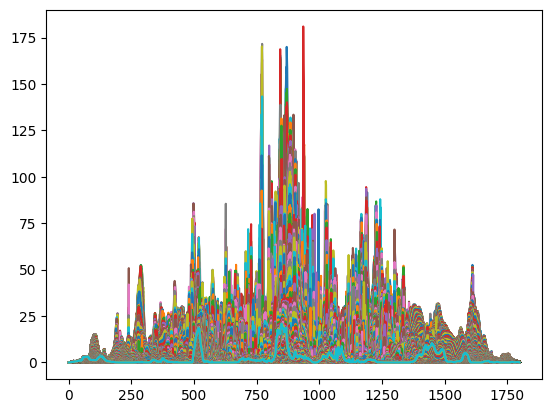

In [27]:
plt.plot(global_precip[0, :, :]) 
plt.colorbar() 
plt.title("Precipitation on April 25, 2020 (mm/day)") 
plt.show()

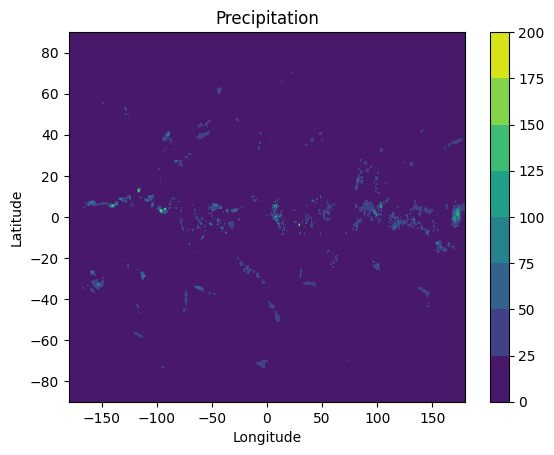

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# Open the netcdf4 file
nc = Dataset('../data/MSWEP/2020116.nc', 'r')

# Extract the required variables from the netcdf4 file
time = nc.variables['time'][:]
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
precip = nc.variables['precipitation'][:]

# Close the netcdf4 file
nc.close()

# Create a meshgrid for latitude and longitude
lon, lat = np.meshgrid(lon, lat)

# Plot the data using contourf
plt.contourf(lon, lat, precip[0,:,:])
plt.colorbar()

# Set the plot title and axes labels
plt.title('Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


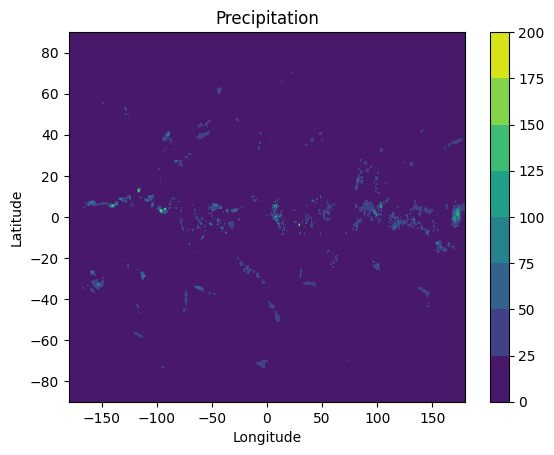

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# Open the netcdf4 file
nc = Dataset('../data/MSWEP/2020116.nc', 'r')

lat_min, lat_max = -23.08, -22.80
lon_min, lon_max = -43.80, -43.10

# Extract the required variables from the netcdf4 file
time = nc.variables['time'][:]
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
precip = nc.variables['precipitation'][:]

# Close the netcdf4 file
nc.close()

# Create a meshgrid for latitude and longitude
lon, lat = np.meshgrid(lon, lat)

# Plot the data using contourf
plt.contourf(lon, lat, precip[0,:,:])
plt.colorbar()

# Set the plot title and axes labels
plt.title('Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [36]:
lat.shape

(1800, 3600)

In [18]:
from netCDF4 import Dataset
import numpy as np

ul_lat, lr_lat = -23.08, -22.80
ul_lon, lr_lon = -43.80, -43.10

# Open the netcdf4 file
nc = Dataset('../data/MSWEP/2020116.nc', 'r')

# Extract the required variables from the netcdf4 file
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:]
precip = nc.variables['precipitation'][:]

# Find the indices of the upper left and lower right corners of the bounding box
lat_ul_idx = np.where(lat >= ul_lat)[0][0]
lat_lr_idx = np.where(lat <= lr_lat)[0][-1]
lon_ul_idx = np.where(lon >= ul_lon)[0][0]
lon_lr_idx = np.where(lon <= lr_lon)[0][-1]

# Slice the data based on the bounding box
precip_box = precip[:, lat_ul_idx:lat_lr_idx+1, lon_ul_idx:lon_lr_idx+1]
lat_box = lat[lat_ul_idx:lat_lr_idx+1]
lon_box = lon[lon_ul_idx:lon_lr_idx+1]

# Close the netcdf4 file
nc.close()


In [14]:
lon[lon_ul_idx:lon_lr_idx+1].shape, lon.shape

((7,), (3600,))

In [15]:
lat[lat_ul_idx:lat_lr_idx+1].shape, lat.shape

((0,), (1800,))

In [16]:
lat, lon

(masked_array(data=[ 89.95    ,  89.85    ,  89.75    , ..., -89.75    ,
                    -89.850006, -89.95001 ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[-179.95   , -179.84999, -179.75   , ...,  179.75002,
                     179.85002,  179.95   ],
              mask=False,
        fill_value=1e+20,
             dtype=float32))

In [19]:
lat_box, lon_box

(masked_array(data=[ 89.95    ,  89.85    ,  89.75    , ..., -89.75    ,
                    -89.850006, -89.95001 ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[-43.750004, -43.649998, -43.54999 , -43.45    ,
                    -43.349995, -43.250004, -43.149998],
              mask=False,
        fill_value=1e+20,
             dtype=float32))

In [62]:
lon, lat = np.meshgrid(lon, lat)

# Plot the data using contourf
plt.contourf(lon_box, lat_box, precip_box[0,:,:])
plt.colorbar()

# Set the plot title and axes labels
plt.title('Precipitation')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


MemoryError: Unable to allocate 153. TiB for an array with shape (6480000, 6480000) and data type float32

In [55]:
lat_box, lon_box

(masked_array(data=[ 89.95    ,  89.85    ,  89.75    , ..., -89.75    ,
                    -89.850006, -89.95001 ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[-43.750004, -43.649998, -43.54999 , -43.45    ,
                    -43.349995, -43.250004, -43.149998],
              mask=False,
        fill_value=1e+20,
             dtype=float32))

In [58]:
precip_box

masked_array(
  data=[[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         ...,
         [0.0625, 0.0625, 0.0625, ..., 0.0625, 0.0625, 0.0625],
         [0.0625, 0.0625, 0.0625, ..., 0.0625, 0.0625, 0.0625],
         [0.0625, 0.0625, 0.0625, ..., 0.0625, 0.0625, 0.0625]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [59]:
precip

masked_array(
  data=[[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         ...,
         [0.3125, 0.3125, 0.3125, ..., 0.1875, 0.1875, 0.1875],
         [0.3125, 0.3125, 0.3125, ..., 0.1875, 0.1875, 0.1875],
         [0.1875, 0.1875, 0.1875, ..., 0.0625, 0.0625, 0.0625]]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)